# DATA ANALYSIS - Bai 01
## Vu Quang Nguyen - Date Modified = 2018.10.29-12.02AM


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import statsmodels.formula.api as smf

In [2]:
data=pd.read_csv('Data_Bai01.csv')

In [3]:
m_hh=5
data['w']=np.NaN
data.loc[0:2,'w']=data.loc[0:2,'m']/m_hh*(55)/(55+16*2)
data.loc[6:8,'w']=data.loc[6:8,'m']/m_hh*(51*2)/(51*2+16*5)
data['Area']=data['N1']

In [4]:
fit_Mn=smf.ols(formula='w~Area',data=data.loc[0:2,]).fit()
fit_V=smf.ols(formula='w~Area',data=data.loc[6:8,]).fit()

In [5]:
# Ham so dang = y = a+ bx (Mn-> V)
pd.concat([fit_Mn.params,fit_V.params])

Intercept   -0.008455
Area         0.000185
Intercept   -0.012270
Area         0.000735
dtype: float64

In [6]:
# TINH SAI SO = (sigma_a -> sigma_b) (Mn-> V)
pd.concat([fit_Mn.bse,fit_V.bse])


Intercept    0.007353
Area         0.000010
Intercept    0.010212
Area         0.000055
dtype: float64

In [7]:
data.loc[3:5,'w']=np.float64(fit_Mn.predict({'Area':data.loc[3:5,'Area']}))
data.loc[9:,'w']=np.float64(fit_V.predict({'Area':data.loc[9:,'Area']}))
# TInh Sai SO
data['Sigma_w']=np.NaN
data.loc[3:5,'Sigma_w']=np.sqrt(fit_Mn.bse[0]**2 +(fit_Mn.bse[1]**2)*data.loc[3:5,'Area'])
data.loc[9:,'Sigma_w']=np.sqrt(fit_V.bse[0]**2   +(fit_V.bse[1]**2)*data.loc[9:,'Area'])
# Danh gia sai so 
data['w_lithuyet']=np.NaN
m_hh=5
data.loc[3:5,'w_lithuyet']=data.loc[3:5,'m']/m_hh*(55)/(55+16*2)
data.loc[9:,'w_lithuyet']=data.loc[9:,'m']/m_hh*(51*2)/(51*2+16*5)
# Sai so = (w - w_lithuyet)/w_lithuyet * 100
data['Saiso']=np.NaN
data['Saiso']=np.abs((data['w']-data['w_lithuyet'])/data['w_lithuyet']*100)
data

,Dongvi,Ten,m,N1,Sigma,w,Area,Sigma_w,w_lithuyet,Saiso
0,56Mn,SS1,0.5,373,5.78,0.063218,373,NaN,NaN,NaN
1,56Mn,SS2,0.8,613,4.19,0.101149,613,NaN,NaN,NaN
2,56Mn,SS3,1.5,1062,3.15,0.189655,1062,NaN,NaN,NaN
3,56Mn,X1,1.2,913,3.46,0.160676,913,0.007359,0.151724,5.900366
4,56Mn,X2,0.6,413,5.29,0.068052,413,0.007356,0.075862,10.294441
5,56Mn,X3,0.6,453,5.06,0.075462,453,0.007356,0.075862,0.526827
6,52V,SS1,1.5,247,6.51,0.168132,247,NaN,NaN,NaN
7,52V,SS2,1.0,164,8.09,0.112088,164,NaN,NaN,NaN
8,52V,SS3,0.7,127,9.67,0.078462,127,NaN,NaN,NaN
9,52V,X1,1.2,179,8.41,0.119315,179,0.010238,0.134505,11.293289


c:\program files\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


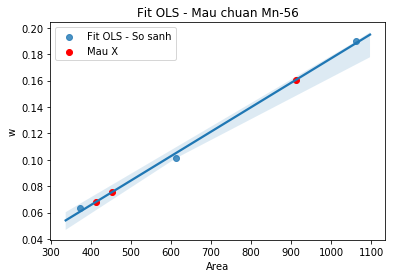

In [8]:
import seaborn as sn
plot1=plt.subplots()
plot1=sn.regplot(x='Area',y='w',data=data.loc[0:2,],label='Fit OLS - So sanh')
plot1=plt.scatter(x='Area',y='w',c='red',data=data.loc[3:5,],label='Mau X')
plt.title('Fit OLS - Mau chuan Mn-56')
plt.legend()
plt.savefig('Mn.png')
plt.show()

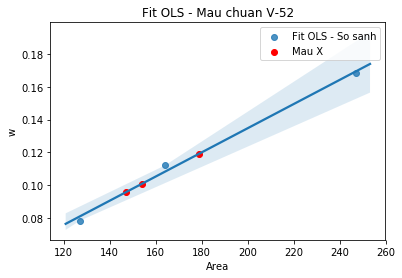

In [9]:
import seaborn as sn
plot1=plt.subplots()
plot1=sn.regplot(x='Area',y='w',data=data.loc[6:8,],label='Fit OLS - So sanh')
plot1=plt.scatter(x='Area',y='w',c='red',data=data.loc[9:,],label='Mau X')
plt.title('Fit OLS - Mau chuan V-52')
plt.legend()
plt.savefig('V.png')
plt.show()

In [10]:
data.to_csv('Data_Bai01_Analysis.csv')